## Animations with interactive control actions

Let's take it one step further by adding interactive control actions. 

TODO: 
1. Buggy, find a better plotting method
2. expand on explanation.

Some Ref: https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20Asynchronous.html

In [1]:
%matplotlib notebook
import control
import numpy as np
import threading
import time

In [2]:
# Import libraries we need for interactive sliders
import matplotlib.pylab as plt
import matplotlib.gridspec as gridspec
from ipywidgets.widgets.interaction import interact
import ipywidgets.widgets as widgets
from IPython.display import display

In [3]:
# Init process
tmax = 2
datapoints = 5
G_s = control.tf([1.5],[1,0.5,1])
T = np.linspace(0,tmax,tmax*datapoints, endpoint=False)
U = np.zeros(len(T))
t , yout, _ = control.forced_response(G_s, T, U)

<IPython.core.display.Javascript object>


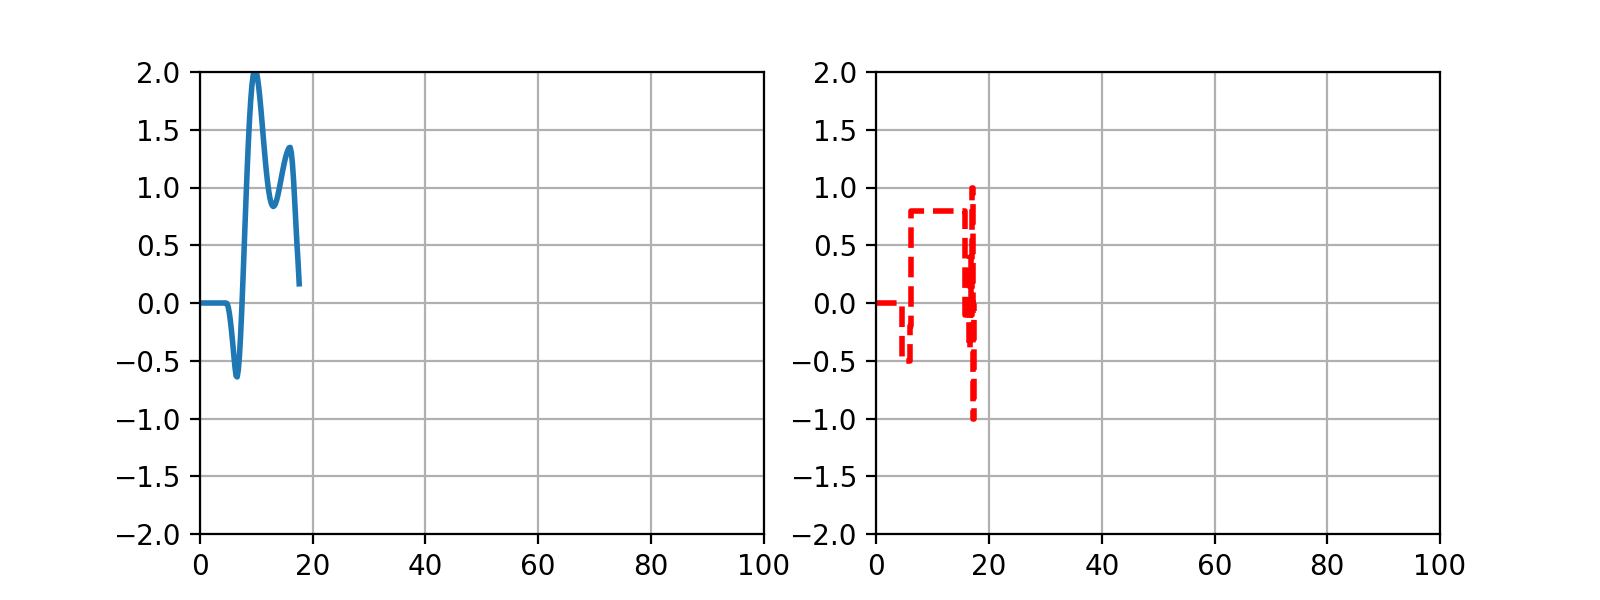

In [4]:
# Create sub plots
gs = gridspec.GridSpec(1, 2)
f = plt.figure();
plt.ion()
ax1 = plt.subplot(gs[0, 0]); # row 0, col 0
ax1.grid(True, which='both');
ax2 = plt.subplot(gs[0, 1]); # row 0, col 1
ax2.grid(True, which='both');
line1, = ax1.plot(T, yout, lw=2);
line2, = ax2.step(T, U, lw=2, linestyle='--', color='r');

max_time = 100
ax1.set_xlim([0, max_time])
ax2.set_xlim([0, max_time])
ax1.set_ylim([-2, 2])
ax2.set_ylim([-2, 2])

def work(w,G_s,T,U,f,ax1,ax2,line1,line2,):
    max_time = 100
    step = T[-1] - T[-2]
    datapoints = 1
    
    for i in range(max_time):
        t , yout, _ = control.forced_response(G_s, T, U)
        line1.set_data(t, yout)
        line2.set_data(t, U)
        ax1.relim(visible_only=True)
        ax2.relim(visible_only=True)
        ax1.autoscale_view(scalex=False, scaley=True)
        ax2.autoscale_view(scalex=False, scaley=True)        
        f.canvas.draw()
        time.sleep(0.1)
        new_T = np.linspace(T[-1]+step,T[-1]+step+1,datapoints,endpoint=False)
        T = np.append(t, new_T)
        U = np.append(U, np.ones(datapoints)*w.value)

w = widgets.FloatSlider(description='Action', min=-1, max=1)
thread = threading.Thread(target=work, args=(w,G_s,T,U,f,ax1,ax2,line1,line2, ))
display(w)
thread.start()